# Teoria de la informacion



In [158]:
import numpy as np
import scipy as sp
from scipy.special import xlogy
import matplotlib.pyplot as plt
%matplotlib inline

## Distribuciones de probabilidad

### Distribucion de Bernoulli

Sea X una variable aleatoria tal que los posibles valores que puede adoptar son X={1, 0}, se dice que X tiene una distribucion de Bernoulli. Esta distribucion depende de un parametro 'p' y se define como:

$$
P(x; p) = \left\{
        \begin{array}{ll}
            p & \quad x = 1 \\
            1-p & \quad x = 0
        \end{array}
    \right.
$$

O bien, en la siguiente forma:

$$
    P(x; p) = p^x(1-p)^{1-x}
$$

In [49]:
# Definicion de la ditribucion de Bernoulli
def bernoulli(x, p):
    return p**x * (1-p)**(1-x)

In [150]:
# Obtener la distribucion de Bernoulli con los
# siguientes parametros:
p = 0.5
X = np.array([0, 1])
pX = bernoulli(X, p)

In [151]:
print('Parametro:')
print('p = {}'.format(p))
print('\nProbabilidades:')
print('P(X=0) = {}\nP(X=1) = {}'.format(pX[0], pX[1]))

Parametro:
p = 0.5

Probabilidades:
P(X=0) = 0.5
P(X=1) = 0.5


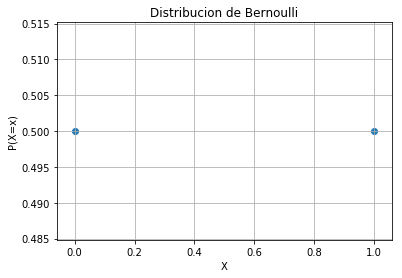

In [152]:
plt.figure()
plt.title('Distribucion de Bernoulli')
plt.scatter(X, pX)
plt.xlabel('X')
plt.ylabel('P(X=x)')
plt.grid(True)
plt.show()

### Informacion
En el contexto de las ciencias de la computacion, se puede pensar en la informacion como la cantidad de bits necesarios para codificar un mensaje que se va a transmitir. La ecuacion matematica que define la informacion de una variable aleatoria X esta dada por:

$$ I(X) = log_2(X) $$

De esta forma, suponiendo que queremos saber la cantidad de informacion para codificar el evento que consite en calcular la probabilidad de obtener una de las 8 caras de un dado es:

$$log_2(8) = 3$$

### Entropia

Se puede definir a la entropia como:

- Cantidad de informacion en promedio que contiene una variable aleatoria
- Cantidad de incertidumbre en promedio de una variable aleatoria

Para obtener la entropia de una v.a X~p(X) descrita por una distribucion de probabilidad, se calcula el valor esperado de esa variable con signo negativo.

$$ H(X) = -E[I(X)] $$
$$ H(X) = -E[log_2(X)] $$
$$ H(X) = -\sum_x p(x)log_2(p(x)) $$

Tambien se puede expresar como:

$$ H(X) = \sum_x p(x)log_2(\frac{1}{p(x)}) $$

Como ejemplo, calcularemos la entropia de la distribucion de Bernoulli para distintos valores del parámetro __p__.

In [167]:
p_vect = np.linspace(0, 1, 50)
h_bernoulli = []
hX = 0

for p in p_vect:
    hX = -np.sum(xlogy(bernoulli(X, p), bernoulli(X, p)))
    h_bernoulli.append(hX)

h_bernoulli = np.array(h_bernoulli) 

Como se puede observar en la siguiente grafica, la entropia en la distribucion de Bernoulli es maxima cuando el parametro p=0.5. Esto se debe a que la incertidumbre entre decidir que evento es mas probable de ocurrir entre X=0 y X=1 es la misma (50% de probabilidad en ambos casos).

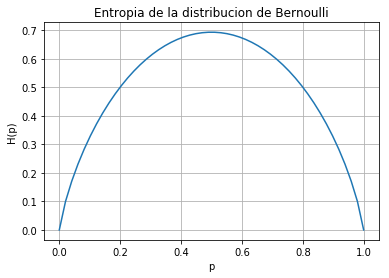

In [168]:
plt.figure()
plt.title('Entropia de la distribucion de Bernoulli')
plt.plot(p_vect, h_bernoulli)
plt.xlabel('p')
plt.ylabel('H(p)')
plt.grid(True)
plt.show()